In [1]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# File to Load 
ride_data_to_load = "data/ride_data.csv"
city_data_to_load = "data/city_data.csv"

# Read the files and store into Pandas data frame
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df = pd.read_csv(city_data_to_load)

In [2]:
#Calculate the statistics
city_data_summary = ride_data_df[['city', 'fare']]
fare_by_city = city_data_summary.groupby(['city'])['fare'].mean()
rides_by_city = city_data_summary.groupby(['city'])['fare'].count()
total_fares_by_city = city_data_summary.groupby(['city'])["fare"].sum()

In [3]:
#Create a summarized table for the city to merge with the rides by city
city_summary = pd.DataFrame({'average fare':fare_by_city,'total fare':total_fares_by_city,"total rides": rides_by_city})

#Combine the data into a single dataset
ride_share_data= pd.merge(city_summary, city_data_df, how='outer', on='city')
ride_share_data.head()

,city,average fare,total fare,total rides,driver_count,type
0,Amandaburgh,24.641667,443.55,18,12,Urban
1,Barajasview,25.332273,557.31,22,26,Urban
2,Barronchester,36.422500,582.76,16,11,Suburban
3,Bethanyland,32.956111,593.21,18,22,Suburban
4,Bradshawfurt,40.064000,400.64,10,7,Rural


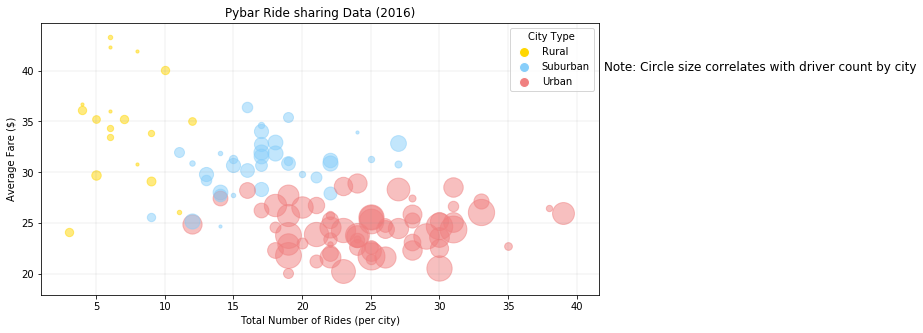

In [16]:
#Obtain the x and y coordinates for each of the three city types

def scatterplot(ride_share_data,x, y):
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    #assign the color to each data point
    colors = ride_share_data['type'].replace(['Rural','Suburban','Urban'], ['gold','lightskyblue','lightcoral'])
    
    #iterate through the dataset plotting each data point and assinging it to the corresponding color and size
    for i in range (len(ride_share_data)):
        
        #define the size of the dot
        size = ride_share_data["driver_count"]*10
        
        #plot each dot
        plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color=colors[i], s=size[i])
    
    #add labels
    plt.title('Pybar Ride sharing Data (2016)')
    plt.xlabel('Total Number of Rides (per city)')
    plt.ylabel('Average Fare ($)')
    
    #add gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5) 

scatterplot(ride_share_data, ride_share_data['total rides'], ride_share_data['average fare'])

#add legend
markers = [Line2D([0], [0], marker='o', markerfacecolor='gold', label='Rural', markersize=10, color='w'), 
           Line2D([0], [0], marker='o', markerfacecolor='lightskyblue', label='Suburban', markersize=10, color='w'),
           Line2D([0], [0], marker='o', markerfacecolor='lightcoral', label='Urban', markersize=10, color='w')]
plt.legend(handles=markers, loc="best", title='City Type')
plt.text(42, 40,"Note: Circle size correlates with driver count by city", fontsize=12)
plt.show()

In [17]:
#Total Rides by City Type
#Calculate total ride by city type
sum_rides_type = ride_share_data.groupby(["type"]).sum()
sum_fares_type = ride_share_data.groupby(["total fare"]).sum()

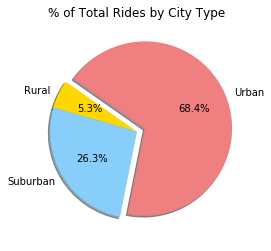

In [21]:
#Build the chart
# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

#Assign the labels
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold','lightskyblue','lightcoral']

#Build Pie Chart
ride_city_type = plt.pie(sum_rides_type['total rides'],explode=explode, labels=labels, 
           colors=colors, autopct="%1.1f%%",startangle=145, shadow = True)

plt.title("% of Total Rides by City Type")

plt.show()

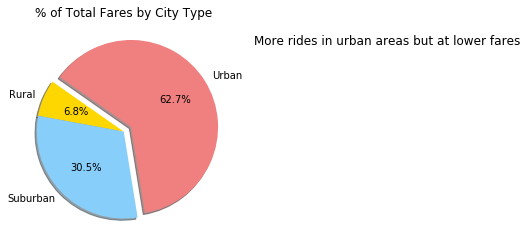

In [22]:
#Total Fares by City Type
#Build Pie Chart
fares_city_type = plt.pie(sum_rides_type['total fare'],explode=explode, labels=labels, 
           colors=colors, autopct="%1.1f%%",startangle=145, shadow = True, )
plt.title("% of Total Fares by City Type")
plt.text(1.5, 1,"More rides in urban areas but at lower fares", fontsize=12)
plt.show()

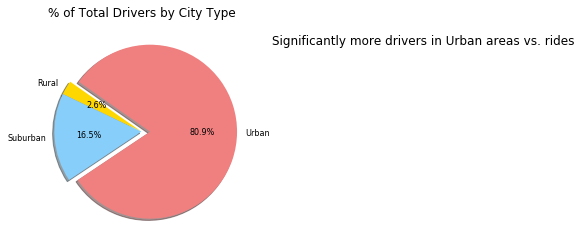

In [23]:
#Total Drivers by City Type
#Build Pie Chart
ride_driver= plt.pie(sum_rides_type['driver_count'],explode=explode, labels=labels, 
           colors=colors, autopct="%1.1f%%",startangle=145,textprops={'fontsize': 8}, shadow=True)
plt.title("% of Total Drivers by City Type")
plt.text(1.5, 1,"Significantly more drivers in Urban areas vs. rides", fontsize=12)
plt.show()